In [1]:
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
X_train.shape
X_test.shape

(10000, 28, 28)

In [5]:
random_image = X_train[0]

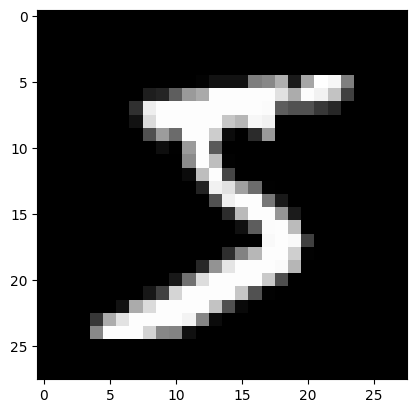

In [6]:
plt.imshow(random_image, cmap='gray')

In [7]:
from keras.utils.np_utils import to_categorical

In [8]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [9]:
# normalize
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

In [10]:
X_train.max()

1.0

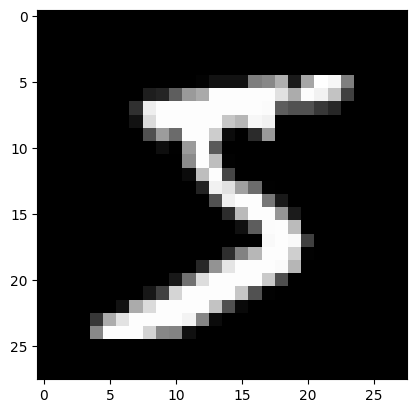

In [11]:
plt.imshow(X_train[0], cmap='gray')

In [12]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D

In [14]:
model = Sequential()

# CONVLUSION
model.add(Conv2D(input_shape=(28, 28, 1), filters=32, kernel_size=(4, 4), activation='relu'))

# POOLING
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN
model.add(Flatten())

# DENSE
model.add(Dense(128, activation='relu'))

# OUTPUT
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [16]:
model.fit(X_train, y_cat_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1360 - accuracy: 0.9590
Epoch 2/2
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0481 - accuracy: 0.9856


In [17]:
from sklearn.metrics import classification_report

In [18]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)

313/313 [==============================] - 1s 3ms/step


In [19]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       979
           1       0.99      0.99      0.99      1132
           2       0.99      0.98      0.98      1043
           3       1.00      0.97      0.98      1035
           4       0.99      0.99      0.99       975
           5       0.99      0.98      0.98       905
           6       0.99      0.99      0.99       960
           7       0.98      0.99      0.99      1011
           8       0.98      0.99      0.98       965
           9       0.98      0.99      0.98       995

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [20]:
image = X_test[0]

In [21]:
image.shape

(28, 28, 1)

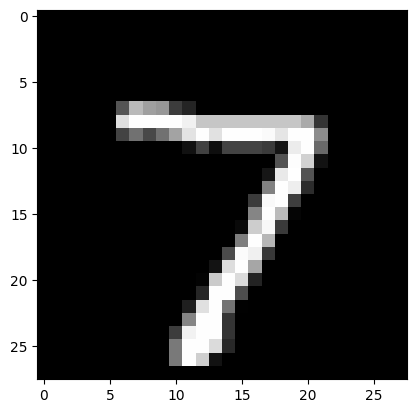

In [22]:
plt.imshow(image, cmap='gray')

In [25]:
import random

1/1 [==============================] - 0s 38ms/step


2

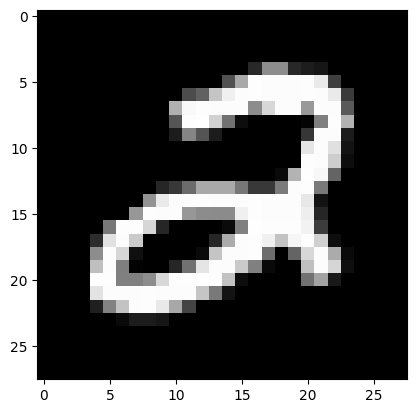

In [29]:
image = random.choice(X_test)
plt.imshow(image, cmap='gray')
pred = model.predict(image.reshape(1, 28, 28, 1))
pred.argmax()